In [1]:
import glob, os, string
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline 
print(pd.__version__)

import seaborn as sns  
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style('darkgrid', rc=rc)
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

0.21.1


In [9]:
# loading flight delays dataset
dfFlight1 = pd.read_csv('FlightDelayData1.csv')
print(dfFlight1.shape)
dfFlight2 = pd.read_csv('FlightDelayData1.csv')
print(dfFlight2.shape)

dfFlight = pd.concat([dfFlight1, dfFlight2], axis=0, ignore_index=True)
print(dfFlight.shape)
dfFlight.head()

(1359709, 14)
(1359709, 14)
(2719418, 14)


,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,4,19,5,DL,11433,13303,837,-3.0,0.0,1138,1.0,0.0,0.0
1,2013,4,19,5,DL,14869,12478,1705,0.0,0.0,2336,-8.0,0.0,0.0
2,2013,4,19,5,DL,14057,14869,600,-4.0,0.0,851,-15.0,0.0,0.0
3,2013,4,19,5,DL,15016,11433,1630,28.0,1.0,1903,24.0,1.0,0.0
4,2013,4,19,5,DL,11193,12892,1615,-6.0,0.0,1805,-11.0,0.0,0.0


In [10]:
dfFlight.drop(['Month', 'DayofMonth', 'DepDel15', 'ArrDel15', 'Cancelled', 'Year'], axis = 1, inplace = True)
print(dfFlight.shape)
dfFlight.head()

(2719418, 8)


,DayOfWeek,Carrier,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,CRSArrTime,ArrDelay
0,5,DL,11433,13303,837,-3.0,1138,1.0
1,5,DL,14869,12478,1705,0.0,2336,-8.0
2,5,DL,14057,14869,600,-4.0,851,-15.0
3,5,DL,15016,11433,1630,28.0,1903,24.0
4,5,DL,11193,12892,1615,-6.0,1805,-11.0


In [11]:
print(dfFlight.shape)
dfFlight.apply(lambda x: sum(x.isnull()),axis=0)

(2719418, 8)


DayOfWeek              0
Carrier                0
OriginAirportID        0
DestAirportID          0
CRSDepTime             0
DepDelay           33928
CRSArrTime             0
ArrDelay           35848
dtype: int64

In [12]:
dfFlight = dfFlight[~pd.isnull(dfFlight).any(axis=1)]
print(dfFlight.shape)

(2683570, 8)


In [13]:
dfFlight.describe()

,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,CRSArrTime,ArrDelay
count,2.683570e+06,2.683570e+06,2.683570e+06,2.683570e+06,2.683570e+06,2.683570e+06,2.683570e+06
mean,3.906849e+00,1.271346e+04,1.271336e+04,1.328043e+03,1.250937e+01,1.503740e+03,9.039295e+00
std,1.994040e+00,1.506294e+03,1.506417e+03,4.759180e+02,3.969192e+01,5.002873e+02,4.250846e+01
min,1.000000e+00,1.014000e+04,1.014000e+04,5.000000e+00,-6.000000e+01,1.000000e+00,-9.400000e+01
25%,2.000000e+00,1.129200e+04,1.129200e+04,9.190000e+02,-4.000000e+00,1.115000e+03,-1.100000e+01
50%,4.000000e+00,1.289200e+04,1.289200e+04,1.320000e+03,-1.000000e+00,1.525000e+03,-2.000000e+00
75%,6.000000e+00,1.405700e+04,1.405700e+04,1.725000e+03,1.100000e+01,1.920000e+03,1.200000e+01
max,7.000000e+00,1.537600e+04,1.537600e+04,2.359000e+03,1.847000e+03,2.359000e+03,1.845000e+03


In [14]:
dfAirport = pd.read_csv("Airport Codes Dataset.csv")
print(dfAirport.shape)
dfAirport.head()

(365, 4)


,airport_id,city,state,name
0,10165,Adak Island,AK,Adak
1,10299,Anchorage,AK,Ted Stevens Anchorage International
2,10304,Aniak,AK,Aniak Airport
3,10754,Barrow,AK,Wiley Post/Will Rogers Memorial
4,10551,Bethel,AK,Bethel Airport


In [18]:
def AirportDescx(Idx):    
    descx = dfAirport.loc[dfAirport.airport_id == Idx]
    return (descx.name + ", " + descx.city + ", " + descx.state).to_string(index=False).lstrip()

lsOrig = dfFlight.OriginAirportID.unique().tolist()
lsDest = dfFlight.DestAirportID.unique().tolist()

lsRouteOr = []
lsRouteDe = []
lsRouteOrName = []
lsRouteDeName = []
lsRouteFq = []
for idOr in lsOrig:
    for idDe in lsDest:        
        if idOr != idDe: 
            Freq = dfFlight.loc[(dfFlight['OriginAirportID'] == idOr) & (dfFlight['DestAirportID'] == idDe)].shape[0]
            if Freq > 0:
                lsRouteOr.append(idOr), lsRouteOrName.append(AirportDescx(idOr))
                lsRouteDe.append(idDe), lsRouteDeName.append(AirportDescx(idDe))
                lsRouteFq.append(Freq)
                
Route = {'OrigAirportID': lsRouteOr, 'OrigAirportName': lsRouteOrName, 'DestAirportID': lsRouteDe, 'DestAirportName': lsRouteDeName, 'RouteFreq': lsRouteFq}
dfRoute = pd.DataFrame(Route, columns = ['OrigAirportID', 'OrigAirportName', 'DestAirportID', 'DestAirportName', 'RouteFreq'])
#dfRoute = dfRoute.sort_values(by='RouteFreq', ascending=False)
dfRoute = dfRoute.reset_index(drop=True)

print(dfRoute.shape)
dfRoute.head()

(2489, 5)


,OrigAirportID,OrigAirportName,DestAirportID,DestAirportName,RouteFreq
0,11433,"Detroit Metro Wayne County, Detroit, MI",13303,"Miami International, Miami, FL",978
1,11433,"Detroit Metro Wayne County, Detroit, MI",12478,"John F. Kennedy International, New York, NY",762
2,11433,"Detroit Metro Wayne County, Detroit, MI",14869,"Salt Lake City International, Salt Lake City,...",1066
3,11433,"Detroit Metro Wayne County, Detroit, MI",12892,"Los Angeles International, Los Angeles, CA",1424
4,11433,"Detroit Metro Wayne County, Detroit, MI",15016,"Lambert-St. Louis International, St. Louis, MO",1310


In [21]:
def dfRouteFtn(dfRoute10, itrMax = 10):
    lsOrDe = []
    lsOr_De = []
    lsDir = []
    lsRouteFq = []
    itr =  0
    for OrId, DeId, Freqx in zip(dfRoute10['OrigAirportID'], dfRoute10['DestAirportID'], dfRoute10['RouteFreq']):
        Freqy = dfRoute10.loc[(dfRoute10['OrigAirportID'] == DeId) & (dfRoute10['DestAirportID'] == OrId)].RouteFreq.to_string(index=False)        
        if (str(OrId) + "_" + str(DeId)) not in lsOrDe and Freqy.isnumeric():
            lsOr_De.append(str(OrId) + "_" + str(DeId)), lsRouteFq.append(Freqx), lsDir.append("Or_De")
            lsOr_De.append(str(OrId) + "_" + str(DeId)), lsRouteFq.append(Freqy), lsDir.append("De_Or")
            lsOrDe.append(str(DeId) + "_" + str(OrId))
            itr += 1
            if itr == itrMax: break
    
    # Create dataframe
    Routx = {'Origin_Destination': lsOr_De,'RouteFreq': lsRouteFq, 'RouteDirection':lsDir }
    dfRoutx = pd.DataFrame(Routx, columns = ['Origin_Destination','RouteFreq', 'RouteDirection'])
    return dfRoutx

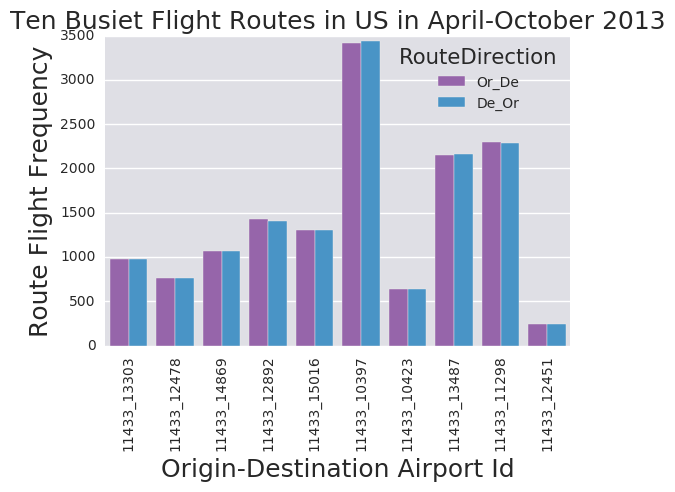

In [28]:
data = dfRouteFtn(dfRoute)
data.RouteFreq = pd.to_numeric(data.RouteFreq, errors='coerce')
BarRects = sns.barplot(x=data.Origin_Destination, y=data.RouteFreq, palette=sns.color_palette(flatui),ci=None,hue=data.RouteDirection)

plt.xticks(rotation=90) 
plt.xlabel('Origin-Destination Airport Id')
plt.ylabel('Route Flight Frequency')

plt.title('Ten Busiet Flight Routes in US in April-October 2013')

plt.show()